# Asset Pricing with Stochastic Discount Factors

Let $p_t$ be the price, at the begining of period $t$,
of an asset that pays $d_{t+j}$ at the end of each period $t + j$.

It satisfies
$$
p_t = E\left[\frac{s_{t+1}}{s_t} (d_t + p_{t+1})\right],
$$
or
$$
\frac{p_t}{d_t} =
E\left[\frac{s_{t+1}}{s_t}
       \left(1 + \frac{d_{t+1}}{d_t} \frac{p_{t+1}}{d_{t+1}}\right)
 \right].
$$

Let the nonnegative matrices $\tilde{P} \in \mathbb{R}^{n \times n}$ and
$\check{P} \in \mathbb{R}^{n \times n}$ be defined by
$$
\begin{aligned}
\tilde{P}_{ij} &= P_{ij} M_{s, ij} M_{d, ij}, \\
\check{P}_{ij} &= P_{ij} M_{s, ij},
\end{aligned}
$$
respectively.

Consider the linear equation (or "Leontief system")
$$
v = \tilde{P} v + c,
$$
where $c = \check{P} \mathbf{1}$.
This has a nonnegative solution for any nonnegative $c$ if and only if
$\tilde{P}$ satisfies the Hawkins-Simon condition,
or all eigenvalues of $\tilde{P}$ are smaller than $1$ in modulus.
A sufficient condition is that all the column sums, or all the row sums, of $\tilde{P}$ are less than one,
which holds when $G_s + G_d \ll 0$.

If $v \in \mathbb{R}^n_+$ is the solution,
the unique solution to the price equation
that satisfies the transversarity condition is
$$
\frac{p_t}{d_t} = v_i \text{ when $X_t = i$}.
$$

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from quantecon.markov import MarkovChain
from asset_pricing_sdf import AssetPricingSDF

In [3]:
# Transition probability matrix
P = [[0.4, 0.6],
     [0.2, 0.8]]

mc = MarkovChain(P)

In [4]:
# Stochastic discount rate matrix
G_s = [[-0.02, -0.03],
       [-0.01, -0.04]]

# Dividend growth rate matrix
G_d = [[0.01, 0.02],
       [0.005, 0.02]]

ap = AssetPricingSDF(mc, G_s, G_d)

(1) Display the $\widetilde M$ matrices for $s_t$ and $d_t$.

In [5]:
ap.mf_s.M_tilde_matrix

array([[ 1.01196282,  0.99202479],
       [ 1.03230156,  0.99192461]])

In [6]:
ap.mf_d.M_tilde_matrix

array([[ 0.99325326,  1.00449783],
       [ 0.98705753,  1.00323562]])

(2) Plot sample paths of $s_t$ and $d_t$.

In [7]:
ts_length = 250
res = ap.simulate(ts_length)

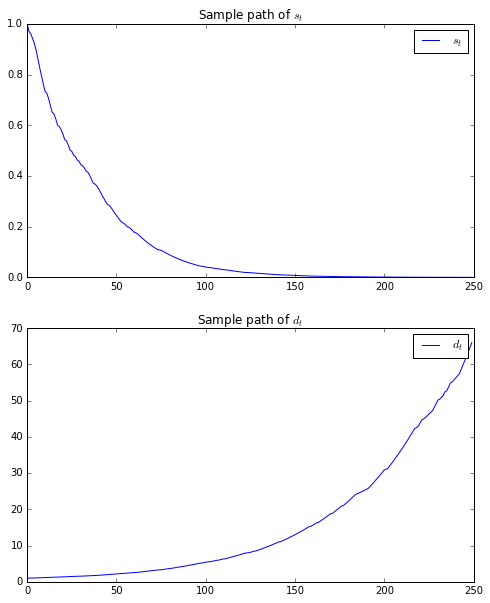

In [8]:
paths = [res.s, res.d]
labels = [r'$s_t$', r'$d_t$']
titles = ['Sample path of ' + label for label in labels]

fig, axes = plt.subplots(2, 1, figsize=(8,10))
for ax, path, label, title in zip(axes, paths, labels, titles):
    ax.plot(path, label=label)
    ax.set_title(title)
    ax.legend()
plt.show()

(2) Print $v$.

In [9]:
ap.v

array([ 64.56797079,  64.00927039])

(3) Plot sample paths of $p_t$ and $d_t$.

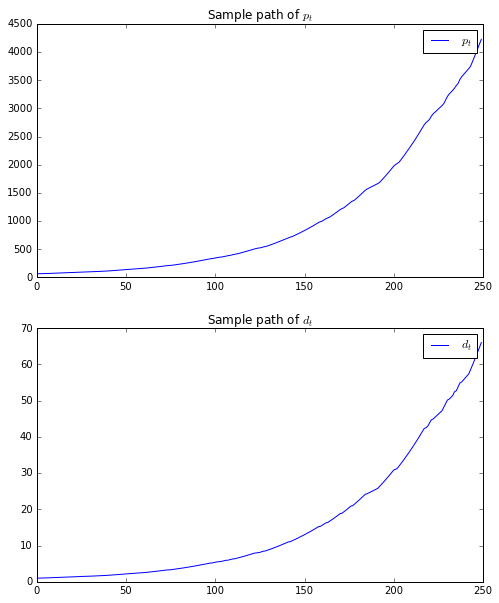

In [10]:
paths = [res.p, res.d]
labels = [r'$p_t$', r'$d_t$']
titles = ['Sample path of ' + label for label in labels]

fig, axes = plt.subplots(2, 1, figsize=(8,10))
for ax, path, label, title in zip(axes, paths, labels, titles):
    ax.plot(path, label=label)
    ax.set_title(title)
    ax.legend()
plt.show()

(5) Experiment with a different $G_s$ matrix.

In [11]:
# Change G_s[0, 1] from -0.03 to -1
G_s_2 = [[-0.02, -1],
         [-0.01, -0.04]]

ap_2 = AssetPricingSDF(mc, G_s_2, G_d)

In [12]:
ap_2.v

array([ 4.09046945,  8.24984429])

In [13]:
res_2 = ap_2.simulate(ts_length)

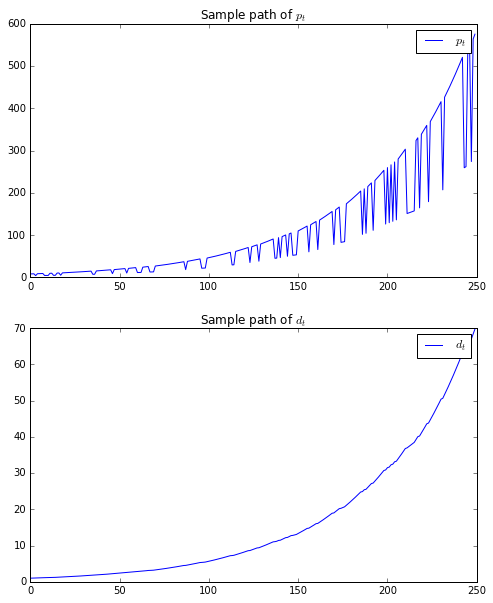

In [14]:
paths = [res_2.p, res_2.d]
labels = [r'$p_t$', r'$d_t$']
titles = ['Sample path of ' + label for label in labels]

fig, axes = plt.subplots(2, 1, figsize=(8,10))
for ax, path, label, title in zip(axes, paths, labels, titles):
    ax.plot(path, label=label)
    ax.set_title(title)
    ax.legend()
plt.show()